In [2]:
def var(Tinterno, t):
    Qpessoas = 6 * Npessoas
    Qkudlik =  o * AreaKudlik * Tkudlik**4 * Nkudlik
    Qentrada = Qpessoas + Qkudlik
    R1 = espessura / (kneve * AinternaIglu)
    R2 = 1/(har * AinternaIglu)
    RT = R1 + R2
    Qsaida = (Tinterno - Tfora) / RT
    dTdt = (Qentrada - Qsaida) * (1/(m0*car))
    return dTdt

In [28]:
from math import pi
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Emissividade da neve
emissividade = 0.9
#coeficiente de transferência convectiva da neve --> 15W/m2k
har = 15
#constante de Boltzman
o = 5.67 * 10**(-8)
# Quantidade de pessoas dentro do iglu
Npessoas = 5
# Quantidade de Kudlik dentro do iglu
Nkudlik = 2
# Area da chama do Kudlik
AreaKudlik = 1.256*10**-3 * 6
# Temperatura do Kudlik
Tkudlik = 900 + 273
#
kneve = 0.3
# raio do iglu --> metros
raio = 4
# area interna do iglu -- m**2
AinternaIglu = 4*pi*raio**2/2
# temperatura exterior --> K
Tfora = -22.15 + 273.15
# temperatura interior -- K
T0 = [Tfora]
# espessura --> m
espessura = 0.33
# volume de ar --> m**3
volume_ar =  4/3*pi*raio**3/2
# densidade do ar --> Kg/m**3
densidade_ar = 1.2922
# massa do iglu --> Kg
m0 = densidade_ar * volume_ar
# calor especifico do ar
car = 1005

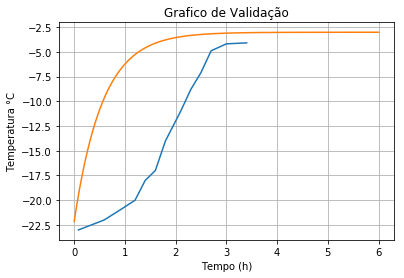

In [29]:
Tmax  =  6*60*60
listaTempo = np.arange(0,Tmax,0.1)

Tempovalidacao = [0.084, 0.59, 0.90, 1.2, 1.4, 1.6, 1.8, 2.0, 2.1, 2.3, 2.5 ,2.7, 3.0, 3.4]
TemperaturaValidacao = [-23,-22,-21,-20,-18,-17,-14,-12,-11,-8.8,-7.1,-4.9,-4.2,-4.1]
plt.title("Grafico de Validação")
plt.plot(Tempovalidacao,TemperaturaValidacao)

solucao = odeint(var,T0,listaTempo)
TempC = [temp-273.15 for temp in solucao[:,0]]
TempoH = [t/3600 for t in listaTempo]
plt.plot(TempoH,TempC)
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura °C')
plt.grid(True)
plt.show()

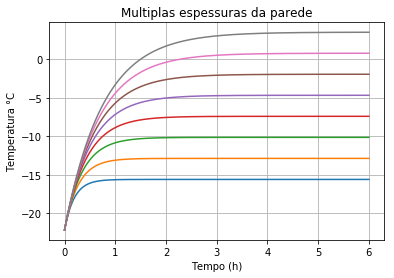

In [30]:
listaEspessura = np.arange(0.1,0.5,0.05)
for espessura in listaEspessura:
    solucao = odeint(var,T0,listaTempo)
    TempC = [temp-273.15 for temp in solucao[:,0]]
    TempoH = [t/3600 for t in listaTempo]
    plt.plot(TempoH,TempC)
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura °C')
plt.title('Multiplas espessuras da parede')
plt.grid(True)
plt.show()

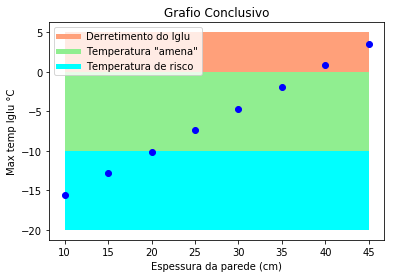

In [31]:
listgraficoKiller = []
listaEspessuraCM = np.arange(10,50,5)
ipotermia = [-10 for x in range(len(listaEspessuraCM))]
derreter = [0 for x in range(len(listaEspessuraCM))]
chao = [-15 for x in range(len(listaEspessuraCM))]
teto = [5 for x in range(len(listaEspessuraCM))]

plt.plot([],[],color='lightsalmon', label='Derretimento do Iglu', linewidth=5)
plt.plot([],[],color='lightgreen', label='Temperatura "amena"', linewidth=5)
plt.plot([],[],color='aqua', label='Temperatura de risco', linewidth=5)

plt.stackplot(listaEspessuraCM, ipotermia,ipotermia, colors=['lightgreen','aqua'])
plt.stackplot(listaEspessuraCM, derreter,teto, colors=['lightsalmon','lightsalmon'])
#plt.label('Derrete o Iglu')


for e in listaEspessuraCM:
    espessura = e / 100
    solucao = odeint(var,T0,listaTempo)
    TempC = [temp-273.15 for temp in solucao[:,0]]
    TempoH = [t/3600 for t in listaTempo]
    listgraficoKiller.append(max(TempC))
plt.plot(listaEspessuraCM,listgraficoKiller,'bo')
plt.title('Grafio Conclusivo')
plt.xlabel('Espessura da parede (cm)')
plt.ylabel('Max temp Iglu °C')
plt.legend()
plt.show()